# Practical Work 1 — Problems & Fully Worked Solutions

This notebook contains fully worked solutions to all problems from *PRACTICAL WORK 1*.
- All problems from *PRACTICAL WORK 1*
- Step-by-step derivations where appropriate
- Python implementations, numerical solutions, and plots

**Libraries used:** `numpy`, `matplotlib`, `scipy`, and optionally `sympy`.


In [17]:
# Core imports
import numpy as np
import matplotlib.pyplot as plt
from math import log, exp

## (1-1) Exponential Growth Model

### Model
Continuous-time exponential growth:

$$
\frac{dN}{dt} = rN \quad \Rightarrow \quad N(t)=N(0)e^{rt}.
$$

Doubling time:

$$
T_d = \frac{\ln 2}{r}.
$$

---

### Problem (1-1)
1. In year 600, human population: 200 million. In year 1300: 360 million.
   - Calculate the per-capita growth rate $r$ (per year), assuming exponential growth.
   - Calculate doubling time.
2. In year 1000: 265 million. In year 1200: 360 million.
   - Assume exponential growth continues at the same rate. Predict population in 1975.
3. In year 1750: 720 million. In year 1850: 1200 million.
   - Compute doubling time for this period and compare. Is constant $r$ reasonable?

In [18]:
# (1-1) Calculations

# Part 1: 600 -> 1300
N600 = 200  # million
N1300 = 360 # million
dt_600_1300 = 1300 - 600  # years

r_600_1300 = (log(N1300/N600)) / dt_600_1300
Td_600_1300 = log(2) / r_600_1300

r_600_1300, Td_600_1300

(0.0008396952355744558, 825.4747093875632)

**Solution (600 → 1300):**

We solve

$$
360 = 200 e^{r\cdot 700}\quad\Rightarrow\quad r=\frac{1}{700}\ln\left(\frac{360}{200}\right).
$$

Then

$$
T_d=\frac{\ln 2}{r}.
$$

In [19]:
print(f"Per-capita growth rate r (600→1300): {r_600_1300:.6f} per year (~{100*r_600_1300:.3f}%/yr)")
print(f"Doubling time Td (600→1300): {Td_600_1300:.1f} years")

Per-capita growth rate r (600→1300): 0.000840 per year (~0.084%/yr)
Doubling time Td (600→1300): 825.5 years


In [20]:
# Part 2: 1000 -> 1200; forecast to 1975
N1000 = 265  # million
N1200 = 360  # million
dt_1000_1200 = 1200 - 1000  # years

r_1000_1200 = (log(N1200/N1000)) / dt_1000_1200

# forecast 1200 -> 1975
dt_1200_1975 = 1975 - 1200
N1975_pred = N1200 * exp(r_1000_1200 * dt_1200_1975)

r_1000_1200, N1975_pred


(0.0015318710273196671, 1180.0405456891353)

**Forecast (1000 → 1200 rate continued to 1975):**

$$
r=\frac{1}{200}\ln\left(\frac{360}{265}\right), \qquad
N(1975)=360\;e^{r(1975-1200)}.
$$

In [21]:
print(f"Per-capita growth rate r (1000→1200): {r_1000_1200:.6f} per year (~{100*r_1000_1200:.3f}%/yr)")
print(f"Predicted population in 1975 (if 1000→1200 rate held): {N1975_pred:.1f} million ({N1975_pred/1000:.2f} billion)")

Per-capita growth rate r (1000→1200): 0.001532 per year (~0.153%/yr)
Predicted population in 1975 (if 1000→1200 rate held): 1180.0 million (1.18 billion)


**Reality check:** Actual 1975 population ≈ 3900 million (3.9 billion), so the medieval-calibrated exponential model underestimates late-20th-century growth, implying a strong increase in effective growth rates over time.


In [22]:
# Part 3: 1750 -> 1850
N1750 = 720   # million
N1850 = 1200  # million
dt_1750_1850 = 1850 - 1750

r_1750_1850 = (log(N1850/N1750)) / dt_1750_1850
Td_1750_1850 = log(2) / r_1750_1850

print(f"Per-capita growth rate r (1750→1850): {r_1750_1850:.6f} per year (~{100*r_1750_1850:.3f}%/yr)")
print(f"Doubling time Td (1750→1850): {Td_1750_1850:.1f} years")

Per-capita growth rate r (1750→1850): 0.005108 per year (~0.511%/yr)
Doubling time Td (1750→1850): 135.7 years


### Semi-log straight-line property*

Show that exponential growth is linear in semi-log coordinates:

If $N(t)=N_0e^{rt}$, then

$$
\ln N(t)=\ln N_0 + rt,
$$

which is a straight line with slope $r$ and intercept $\ln N_0$.

We verify this numerically and with a plot.

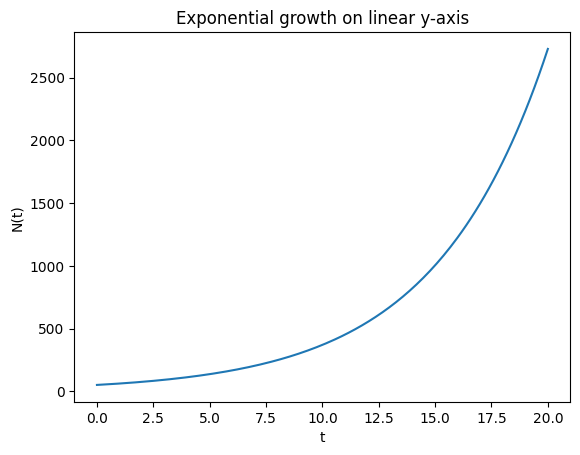

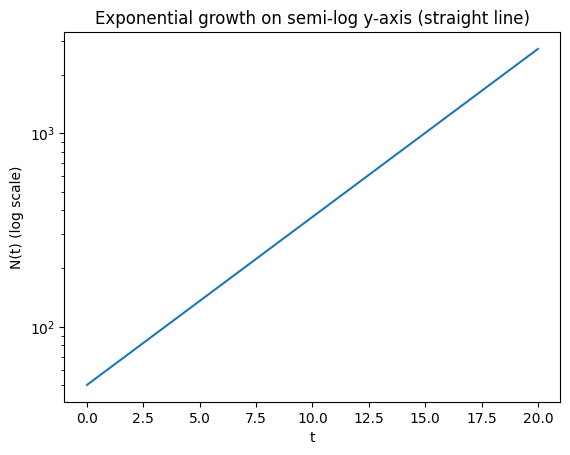

Fitted slope, intercept for ln(N) = intercept + slope*t: 0.20000000000000004 3.912023005428146


In [23]:
# Semi-log demonstration
N0 = 50
r = 0.2
t = np.linspace(0, 20, 200)
N = N0 * np.exp(r*t)

plt.figure()
plt.plot(t, N)
plt.xlabel("t")
plt.ylabel("N(t)")
plt.title("Exponential growth on linear y-axis")
plt.show()

plt.figure()
plt.semilogy(t, N)
plt.xlabel("t")
plt.ylabel("N(t) (log scale)")
plt.title("Exponential growth on semi-log y-axis (straight line)")
plt.show()

# Check linearity of ln(N) vs t
coef = np.polyfit(t, np.log(N), 1)
print("Fitted slope, intercept for ln(N) = intercept + slope*t:", coef[0], coef[1])

### Fibonacci rabbits & Golden Ratio*

Classic Fibonacci recurrence:

$$
F_{n+1}=F_n + F_{n-1}.
$$

Try $F_n\sim \lambda^n$, giving

$$
\lambda^2=\lambda+1\quad\Rightarrow\quad \lambda=\frac{1\pm \sqrt{5}}{2}.
$$

The dominant growth factor is the **Golden Ratio**

$$
\phi=\frac{1+\sqrt{5}}{2}\approx 1.618.
$$

We compute ratios $F_{n+1}/F_n$ to see convergence to $\phi$.

In [24]:
# Fibonacci ratios converge to golden ratio
fib = [1, 1]
for i in range(2, 25):
    fib.append(fib[i-1] + fib[i-2])

ratios = [fib[i+1]/fib[i] for i in range(5, 20)]
print("Selected ratios F[n+1]/F[n]:")
for i, val in enumerate(ratios, start=6):
    print(f"n={i}: {val:.6f}")

phi = (1 + 5**0.5)/2
print("Golden ratio phi:", phi)

Selected ratios F[n+1]/F[n]:
n=6: 1.625000
n=7: 1.615385
n=8: 1.619048
n=9: 1.617647
n=10: 1.618182
n=11: 1.617978
n=12: 1.618056
n=13: 1.618026
n=14: 1.618037
n=15: 1.618033
n=16: 1.618034
n=17: 1.618034
n=18: 1.618034
n=19: 1.618034
n=20: 1.618034
Golden ratio phi: 1.618033988749895


### Fibonacci rabbits die after their second year*

One simple way to model a **2-year lifespan** is with two classes:
- $J_t$: juveniles (non-reproductive)
- $A_t$: adults (reproductive, die after reproducing)

Assuming each adult produces one new juvenile each time step and adults do **not** survive to the next time step:

$$
J_{t+1}=A_t,\qquad A_{t+1}=J_t.
$$

This gives the matrix model

$$
\begin{pmatrix}J_{t+1}\\A_{t+1}\end{pmatrix}=
\begin{pmatrix}0&1\\1&0\end{pmatrix}
\begin{pmatrix}J_t\\A_t\end{pmatrix}.
$$

Eigenvalues are $\pm 1$ so the dominant growth factor is 1: **no long-term growth**.
However, the *age structure* oscillates: juveniles and adults alternate each time step (a 2-cycle).

We simulate to illustrate this.

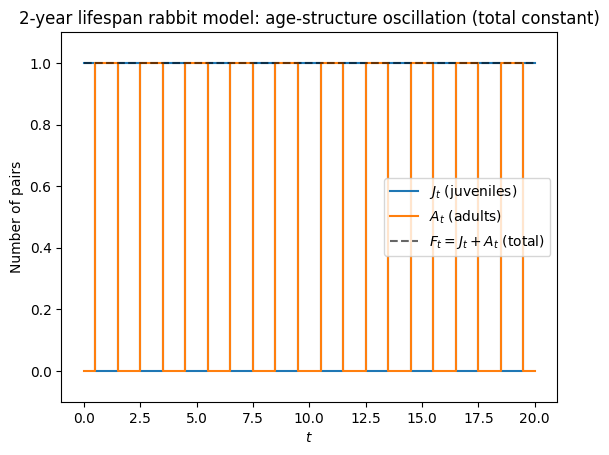

[(1, 0, 1),
 (0, 1, 1),
 (1, 0, 1),
 (0, 1, 1),
 (1, 0, 1),
 (0, 1, 1),
 (1, 0, 1),
 (0, 1, 1),
 (1, 0, 1),
 (0, 1, 1)]

In [25]:
# Simulate the 2-year lifespan rabbit model
T = 20
J = np.zeros(T+1)
A = np.zeros(T+1)

# start with one juvenile pair
J[0] = 1
A[0] = 0

for t_ in range(T):
    # adults at time t_ reproduce (one juvenile) then die
    J[t_+1] = A[t_]
    # juveniles mature into adults
    A[t_+1] = J[t_]

F = J + A

plt.figure()
plt.step(range(T+1), J, where='mid', label=r'$J_t$ (juveniles)')
plt.step(range(T+1), A, where='mid', label=r'$A_t$ (adults)')
plt.step(range(T+1), F, where='mid', linestyle='--', color='k', alpha=0.6, label=r'$F_t=J_t+A_t$ (total)')
plt.xlabel(r'$t$')
plt.ylabel('Number of pairs')
plt.title('2-year lifespan rabbit model: age-structure oscillation (total constant)')
plt.ylim(-0.1, 1.1)
plt.legend()
plt.show()

# Show the oscillation explicitly
list(zip(J[:10].astype(int).tolist(), A[:10].astype(int).tolist(), F[:10].astype(int).tolist()))

## (1-2) Continuous Logistic Equation — Bifurcation Diagram

### Model

$$
\frac{dn}{dt} = r\,n\,(K-n)
$$

with parameters $r$ and $K$ (carrying capacity).

Equilibria solve $0 = r n (K-n)\Rightarrow n^*=0$ or $n^*=K$.

---

### Problem (1-2)
(a) Simulate the ODE with $r=1$ while stepping $K$ from 3 to -3, recording the *stable* equilibrium reached.

(b) Numerically find equilibria by root-finding for $0 = r n (K-n)$ using continuation:
- start near $n\approx K$ to track the $n=K$ branch,
- start near $n\approx 0$ to track the $n=0$ branch.

(c) Linearize and identify stable vs unstable branches.

In [26]:
# We'll use scipy for numerical integration & root finding
from scipy.integrate import solve_ivp
from scipy.optimize import root


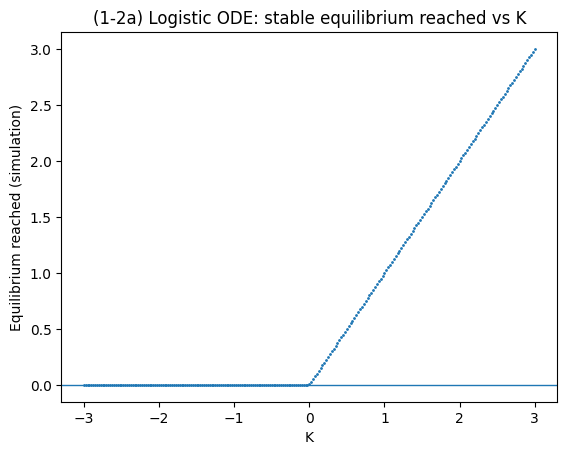

In [27]:
def logistic_rhs(t, n, r, K):
    return r*n*(K - n)

# (a) Simulate and record stable equilibrium
r = 1.0
Ks = np.linspace(3, -3, 241)  # step from 3 down to -3
stable_eq = []

n0 = 0.1  # non-zero initial condition
t_span = (0, 50)
t_eval = np.linspace(t_span[0], t_span[1], 2000)

for K in Ks:
    sol = solve_ivp(logistic_rhs, t_span, [n0], t_eval=t_eval, args=(r, K), rtol=1e-8, atol=1e-10)
    n_end = sol.y[0, -1]
    stable_eq.append(n_end)
    # continuation in IC helps convergence
    n0 = max(n_end, 1e-8)

stable_eq = np.array(stable_eq)

plt.figure()
plt.plot(Ks, stable_eq, marker='.', linestyle='none', markersize=2)
plt.axhline(0, linewidth=1)
plt.xlabel("K")
plt.ylabel("Equilibrium reached (simulation)")
plt.title("(1-2a) Logistic ODE: stable equilibrium reached vs K")
plt.show()

### (1-2b) Root-finding / continuation for both equilibrium branches

Equilibria satisfy $f(n) = r n (K-n) = 0$.

We numerically track solutions as $K$ decreases:
- Start with an initial guess near $n\approx K$ to follow the $n=K$ branch
- Start with an initial guess near $n\approx 0$ to follow the $n=0$ branch

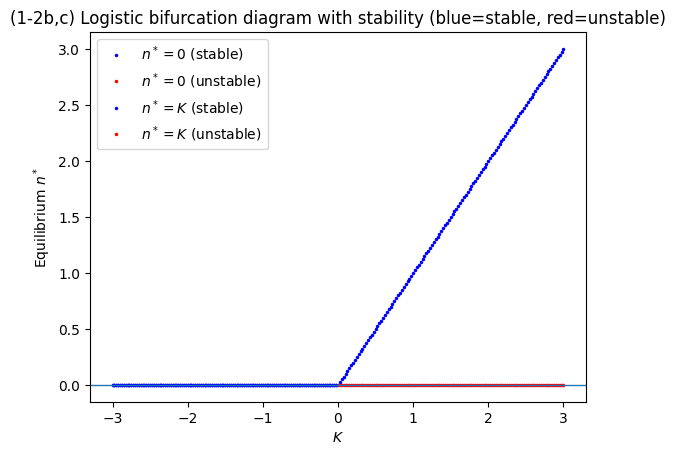

In [28]:
def equilibrium_root(K, guess, r=1.0):
    f = lambda n: r*n*(K - n)
    sol = root(lambda x: f(x[0]), x0=np.array([guess]))
    return sol.x[0], sol.success

Ks2 = np.linspace(3, -3, 241)

# Track n=K branch
eq_K = []
guess = 3.0
for K in Ks2:
    val, ok = equilibrium_root(K, guess, r=r)
    eq_K.append(val if ok else np.nan)
    guess = val

# Track n=0 branch
eq_0 = []
guess = 1e-6
for K in Ks2:
    val, ok = equilibrium_root(K, guess, r=r)
    eq_0.append(val if ok else np.nan)
    guess = val

eq_K = np.array(eq_K)
eq_0 = np.array(eq_0)

# Stability by linearization: f'(n)=r(K-2n)
def stability(K, n, r=1.0):
    fp = r*(K - 2*n)
    return fp < 0  # stable if derivative negative

stable_K = np.array([stability(K, n, r=r) for K, n in zip(Ks2, eq_K)])
stable_0 = np.array([stability(K, n, r=r) for K, n in zip(Ks2, eq_0)])

plt.figure()
# plot branches with stability styling
plt.plot(Ks2[stable_0], eq_0[stable_0], 'b.', markersize=3, label=r'$n^*=0$ (stable)')
plt.plot(Ks2[~stable_0], eq_0[~stable_0], 'r.', markersize=3, label=r'$n^*=0$ (unstable)')
plt.plot(Ks2[stable_K], eq_K[stable_K], 'b.', markersize=3, label=r'$n^*=K$ (stable)')
plt.plot(Ks2[~stable_K], eq_K[~stable_K], 'r.', markersize=3, label=r'$n^*=K$ (unstable)')
plt.axhline(0, linewidth=1)
plt.xlabel(r'$K$')
plt.ylabel(r'Equilibrium $n^*$')
plt.title("(1-2b,c) Logistic bifurcation diagram with stability (blue=stable, red=unstable)")
plt.legend()
plt.show()

### (1-2c) Linearization and stability

Let $f(n)=r n (K-n)$. Then

$$
f'(n)=r(K-2n).
$$

At $n^*=0$: $f'(0)=rK$ so stable if $K<0$, unstable if $K>0$.

At $n^*=K$: $f'(K)=r(K-2K)=-rK$ so stable if $K>0$, unstable if $K<0$.

This is a **transcritical bifurcation** at $K=0$.

## (1-3) Levins’ Metapopulation Model with Habitat Destruction

### Model

$$
\frac{dp}{dt} = m\,p(1-D-p) - e\,p.
$$

Here $p$ is fraction of patches occupied, $m$ colonization rate, $e$ extinction rate, and $D$ fraction destroyed (unavailable).

### Problem (1-3)
1. Find equilibria and determine stability.
2. Plot equilibrium solutions as a function of $D$ using numerical root-finding (as in 1-2).

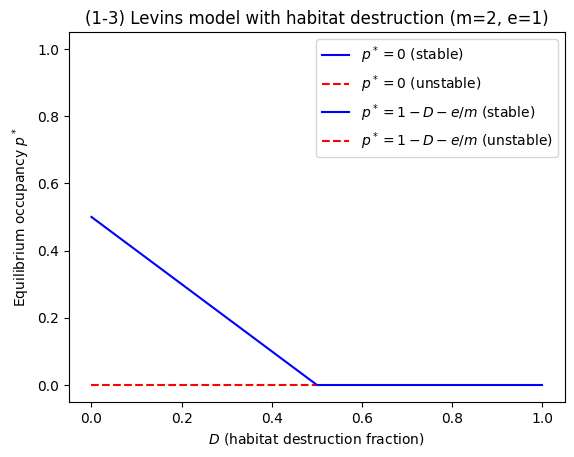

Critical destruction threshold Dcrit = 1 - e/m = 0.5


In [29]:
def levins_destroy_rhs(p, m, e, D):
    return m*p*(1 - D - p) - e*p

# Analytic equilibria:
# p*=0 and p*=1-D-e/m (when positive)

# We'll demonstrate with specific parameter choices and plot branches
m = 2.0
e = 1.0
Ds = np.linspace(0, 1, 501)

p0 = np.zeros_like(Ds)
p_pos = 1 - Ds - e/m  # may be negative

# Stability: f'(p)=d/dp[m p(1-D-p)-e p] = m(1-D-2p)-e
def levins_destroy_stable(p, m, e, D):
    fp = m*(1 - D - 2*p) - e
    return fp < 0

stable_p0 = np.array([levins_destroy_stable(0.0, m, e, D) for D in Ds])
stable_pp = np.array([levins_destroy_stable(p, m, e, D) if np.isfinite(p) else False for p, D in zip(p_pos, Ds)])

plt.figure()
# p=0 branch
plt.plot(Ds[stable_p0], p0[stable_p0], 'b-', label=r'$p^*=0$ (stable)')
plt.plot(Ds[~stable_p0], p0[~stable_p0], 'r--', label=r'$p^*=0$ (unstable)')

# positive branch
mask_exists = p_pos >= 0
plt.plot(Ds[mask_exists & stable_pp], p_pos[mask_exists & stable_pp], 'b-', label=r'$p^*=1-D-e/m$ (stable)')
plt.plot(Ds[mask_exists & ~stable_pp], p_pos[mask_exists & ~stable_pp], 'r--', label=r'$p^*=1-D-e/m$ (unstable)')

plt.xlabel(r'$D$ (habitat destruction fraction)')
plt.ylabel(r'Equilibrium occupancy $p^*$')
plt.title("(1-3) Levins model with habitat destruction (m=2, e=1)")
plt.ylim(-0.05, 1.05)
plt.legend()
plt.show()

Dcrit = 1 - e/m
print("Critical destruction threshold Dcrit = 1 - e/m =", Dcrit)

### Analytical solution & stability

Equilibria from $0 = m p(1-D-p) - e p = p[m(1-D-p)-e]$:

- $p^*=0$
- $p^*=1-D-\frac{e}{m}$ (exists as a biologically meaningful equilibrium only if $p^*>0$, i.e. $m(1-D) > e$).

Stability from derivative:

$$
f'(p)=m(1-D-2p)-e.
$$

- At $p^*=0$: stable if $m(1-D)-e<0$ (i.e. $D>1-e/m$)
- At $p^*=1-D-e/m$: stable whenever it exists ($m(1-D)>e$)

Thus the system shows a transcritical bifurcation at

$$
D_{\rm crit}=1-\frac{e}{m}.
$$

## (1-3) Levins’ Metapopulation Model with Rescue Effect

### Model

$$
\frac{dp}{dt} = m p(1-p) - e_0 p \exp(-ap).
$$

### Problem (1-3, rescue effect)
1. Can you solve for equilibrium with pen & paper? Why is it difficult?
2. Plot equilibria as a function of $m$ (hint: swap x and y axes).
3. Determine stability and interpret the bifurcation structure. Compare to the case $a=0$.

We'll:
- Use the implicit equilibrium condition for $p>0$:

$$
m(1-p) = e_0 e^{-ap}\quad\Rightarrow\quad m(p) = \frac{e_0 e^{-ap}}{1-p}.
$$

- Plot $m$ vs $p$ (axis swap), then invert mentally to see $p$ vs $m$.
- Compute stability using linearization $f'(p)$.

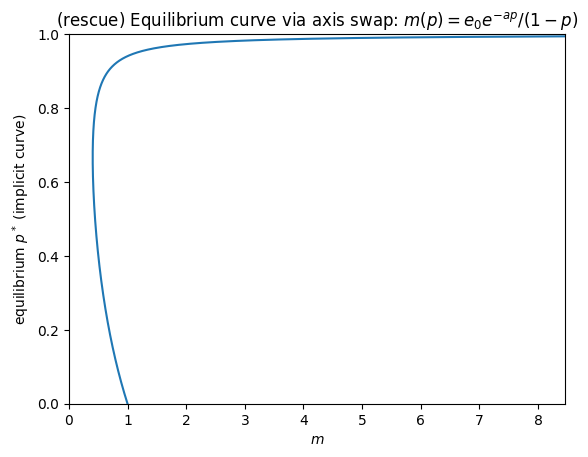

Approx saddle-node at:
p ~ 0.6666995997998999 m ~ 0.4060058516915454


In [30]:
def levins_rescue_rhs(p, m, e0, a):
    return m*p*(1 - p) - e0*p*np.exp(-a*p)

def levins_rescue_fp(p, m, e0, a):
    # derivative wrt p of RHS
    # f(p) = m p (1-p) - e0 p exp(-a p)
    # f'(p) = m(1-2p) - e0[exp(-ap) + p(-a)exp(-ap)]
    return m*(1 - 2*p) - e0*(np.exp(-a*p) - a*p*np.exp(-a*p))

# Parameters given in sheet (use e0=1, a=3, explore m)
e0 = 1.0
a = 3.0

# Axis-swap curve: m(p) for p in (0,1)
p_grid = np.linspace(1e-4, 0.999, 2000)
m_curve = (e0*np.exp(-a*p_grid)) / (1 - p_grid)

plt.figure()
plt.plot(m_curve, p_grid)
plt.xlabel(r'$m$')
plt.ylabel(r'equilibrium $p^*$ (implicit curve)')
plt.title(r"(rescue) Equilibrium curve via axis swap: $m(p)=e_0 e^{-a p}/(1-p)$")
plt.xlim(0, np.percentile(m_curve, 99.5))
plt.ylim(0, 1)
plt.show()

# Find saddle-node (minimum of m(p))
idx = np.argmin(m_curve)
print("Approx saddle-node at:")
print("p ~", p_grid[idx], "m ~", m_curve[idx])

### Why solving analytically is difficult

Equilibria satisfy, for $p>0$:

$$
m(1-p)=e_0 e^{-ap}.
$$

The unknown $p$ appears both in a polynomial term $(1-p)$ and inside an exponential $e^{-ap}$, giving a **transcendental** equation. There is no elementary closed-form solution for $p(m)$ in general (it can be expressed using special functions in some rearrangements, but the practical approach is numerical).

### Finding stable vs unstable branches

We can find equilibria for each $m$ using root finding with continuation (like earlier), using multiple initial guesses to capture multiple branches. We'll scan $m$ over a range and collect roots found from different starting guesses, then assess stability from $f'(p^*)<0$.

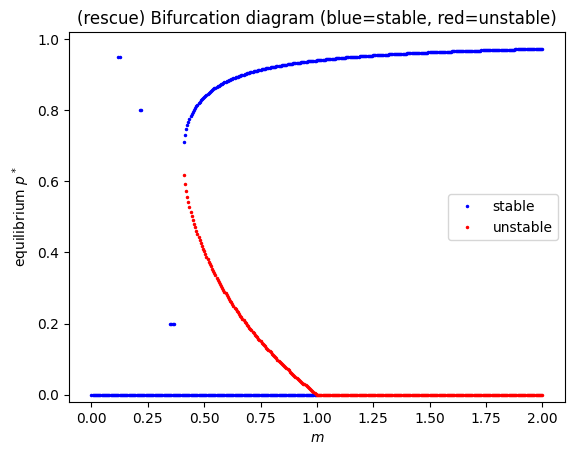

p=0 changes stability at m=e0 = 1.0


In [31]:
from collections import defaultdict

def find_equilibria_for_m(m, e0, a, guesses):
    roots = []
    for g in guesses:
        sol = root(lambda x: levins_rescue_rhs(x[0], m, e0, a), x0=np.array([g]))
        if sol.success:
            p = sol.x[0]
            # keep within [0,1] with tolerance
            if -1e-6 <= p <= 1+1e-6:
                p = min(max(p, 0.0), 1.0)
                roots.append(p)
    # deduplicate
    roots_sorted = sorted(roots)
    uniq = []
    for p in roots_sorted:
        if not uniq or abs(p - uniq[-1]) > 1e-3:
            uniq.append(p)
    return uniq

ms = np.linspace(0.0, 2.0, 401)
guesses = [0.0, 1e-4, 0.05, 0.2, 0.5, 0.8, 0.95]

all_roots = []
all_m = []
all_stable = []

for m in ms:
    roots = find_equilibria_for_m(m, e0, a, guesses)
    for p in roots:
        fp = levins_rescue_fp(p, m, e0, a)
        stable = fp < 0
        all_m.append(m)
        all_roots.append(p)
        all_stable.append(stable)

all_m = np.array(all_m)
all_roots = np.array(all_roots)
all_stable = np.array(all_stable)

plt.figure()
plt.plot(all_m[all_stable], all_roots[all_stable], 'b.', markersize=3, label='stable')
plt.plot(all_m[~all_stable], all_roots[~all_stable], 'r.', markersize=3, label='unstable')
plt.xlabel(r'$m$')
plt.ylabel(r'equilibrium $p^*$')
plt.title("(rescue) Bifurcation diagram (blue=stable, red=unstable)")
plt.ylim(-0.02, 1.02)
plt.legend()
plt.show()

# Note: p=0 stability threshold is m=e0
print("p=0 changes stability at m=e0 =", e0)

### Interpreting the rescue-effect bifurcation

- The **axis-swap curve** $m(p)=\frac{e_0 e^{-ap}}{1-p}$ typically has a minimum for $a>0$.
- That minimum corresponds to a **saddle-node bifurcation**, where two equilibria (one stable, one unstable) appear.
- Separately, $p=0$ changes stability at $m=e_0$ because:

  $$
  f'(0)=m-e_0.
  $$

- When $a=0$, $e_0 e^{-ap}=e_0$ is constant and the model reduces to classic Levins:

  $$
  \frac{dp}{dt}=mp(1-p)-e_0 p,
  $$

  which has only a **transcritical** bifurcation at $m=e_0$ and no saddle-node.

The unstable branch is the “missing branch” if you only track stable solutions by simulation.